In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gensim.models import TfidfModel
from gensim.corpora import Dictionary

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn.linear_model import LinearRegression, Ridge, PoissonRegressor, TweedieRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score

from sklearn.model_selection import train_test_split

In [4]:
df_raw = pd.read_csv('../data/interim/preproc.csv', index_col=0)

df = df_raw[(df_raw["num_commits"]>0) & (df_raw['num_commits']<3e5) & (df_raw['lines_removed']<3e6) & (df_raw['lines_added']<3e6)].dropna()

target = 'lines_added'
#df[target] = df['num_commits']+df['lines_removed']

df.head()

{'Bug',
 'Dependency upgrade',
 'Documentation',
 'Epic',
 'Improvement',
 'New Feature',
 'Project',
 'Question',
 'RTC',
 'Story',
 'Sub-task',
 'Task',
 'Technical task',
 'Test',
 'Umbrella',
 'Wish'}

# Loading Data

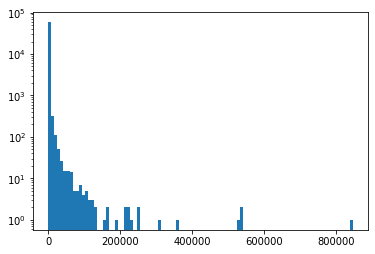

In [3]:
plt.hist(df[target], log=True, bins=100)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, df[target], test_size=0.2, random_state=123)

# TF-IDF model

In [5]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train["text"])
svd = TruncatedSVD(n_components=200, random_state=123)
X_train_svd = svd.fit_transform(X_train_tfidf)

X_test_tfidf = vectorizer.transform(X_test["text"])
X_test_svd = svd.transform(X_test_tfidf)

# Modeling

In [6]:
def compute_scores(model, train, test, y_train, y_test, namemodel):
    """
    Computes and prints several metrics given a model. 
    """
    y_pred = model.predict(train)
    train_abs_error = mean_absolute_error(y_train, y_pred)
    train_r2_score = r2_score(y_train, y_pred)

    y_pred = model.predict(test)
    test_abs_error = mean_absolute_error(y_test, y_pred)
    test_r2_score = r2_score(y_test, y_pred)

    print('Absolute error for '+namemodel+':')
    print('- Train:', round(train_abs_error,2))
    print('- Test:', round(test_abs_error,2))

    print('R2 score for '+namemodel+':')
    print('- Train:', round(train_r2_score,6))
    print('- Test:', round(test_r2_score,6))

## Linear Regression

In [7]:
lm = LinearRegression().fit(X_train_svd, y_train)

In [8]:
compute_scores(lm, X_train_svd, X_test_svd, y_train, y_test, 'LM')

Absolute error for LM:
- Train: 1030.35
- Test: 991.6
R2 score for LM:
- Train: 0.012583
- Test: 0.003415


## Ridge Regression

In [9]:
ridge = Ridge().fit(X_train_svd, y_train)

In [10]:
compute_scores(ridge, X_train_svd, X_test_svd, y_train, y_test, 'RIDGE')

Absolute error for RIDGE:
- Train: 1024.51
- Test: 985.54
R2 score for RIDGE:
- Train: 0.012579
- Test: 0.004017


## Gaussian Naive Bayes

In [140]:
gnb = GaussianNB().fit(X_train_svd, y_train)

In [141]:
compute_scores(gnb, X_train_svd, X_test_svd, y_train, y_test, 'GNB')

Absolute error for GNB:
- Train: 302.71
- Test: 744.84
R2 score for GNB:
- Train: 0.991406
- Test: 0.01287


## Random Forest Regressor

In [100]:
np.random.seed(1234)
rf = RandomForestRegressor(max_depth=3, n_estimators=160, n_jobs=-1).fit(X_train_svd, y_train)

In [137]:
compute_scores(rf, X_train_svd, X_test_svd, y_train, y_test, 'RF')

Absolute error for RF:
- Train: 905.1
- Test: 890.92
R2 score for RF:
- Train: 0.167543
- Test: -0.105948


## Multi-layer Perceptron Regressor (NN)

In [130]:
mlp = MLPRegressor(max_iter=500, hidden_layer_sizes=(12,10,6), early_stopping=True).fit(X_train_svd, y_train)

In [138]:
compute_scores(mlp, X_train_svd, X_test_svd, y_train, y_test, 'MLP')

Absolute error for MLP:
- Train: 907.6
- Test: 865.28
R2 score for MLP:
- Train: 0.008523
- Test: 0.011937
